# ***The Great Giochini***

Import useful libraries

In [45]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
import seaborn as sns

Path (select yours, comment others)

In [46]:
#path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

Create files list and dataframe

In [47]:
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

### **Polynomial interpolation of time series**

Let's plot a single time series

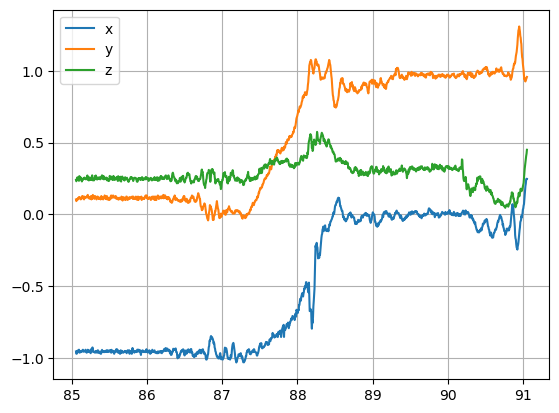

In [84]:
test=250

df = li[test]

x = np.asarray(df.x)
y = np.asarray(df.y)
z = np.asarray(df.z)
t = np.asarray(df.t)

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')

plt.grid()
plt.legend()
plt.show()

This is the polynomial interpolation

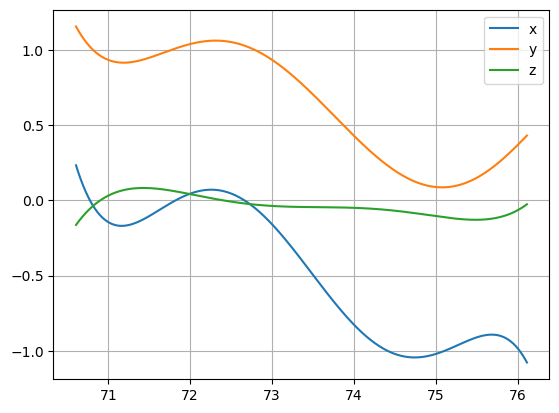

In [49]:
coef_x = np.polyfit(t,x,deg=5,full=False)
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = np.polyfit(t,y,deg=5,full=False)
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = np.polyfit(t,z,deg=5,full=False)
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

Now, we do this for all the time series

In [50]:
def extrapolate(ls,k):

    # Create columns of the output dataset
    columns = []
    for prefix in ['x', 'y', 'z']:
        for i in range(0, k+1):
            columns.append(f"{prefix}_{i}")
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)

        # Get values from every table
        x = np.asarray(ls[i].x)
        y = np.asarray(ls[i].y)
        z = np.asarray(ls[i].z)
        t = np.asarray(ls[i].t)

        # Get coefficients of the polynomial fit of order k of x, y, z
        coef_x = np.polyfit(t,x,deg=k,full=False)
        coef_y = np.polyfit(t,y,deg=k,full=False)
        coef_z = np.polyfit(t,z,deg=k,full=False)
        
        # Add coefficients to the final dataset
        row = []
        for j in np.arange(k+1):
            row.append(coef_x[j])
        for j in np.arange(k+1):
            row.append(coef_y[j])
        for j in np.arange(k+1):
            row.append(coef_z[j])
        df.loc[i] = row

    return df


df = extrapolate(li,5)
df

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.001146,0.287879,-28.910969,1450.618010,-3.636437e+04,3.643490e+05,-0.000810,0.201414,-20.035357,995.988862,-2.474333e+04,2.457522e+05,0.001417,-0.354840,35.534621,-1778.265926,4.446966e+04,-4.445691e+05
1,-0.000432,0.082809,-6.330716,241.462040,-4.594694e+03,3.489477e+04,0.000022,-0.004424,0.357892,-14.368130,2.864671e+02,-2.269506e+03,-0.000114,0.022736,-1.809435,71.699760,-1.415041e+03,1.112998e+04
2,-0.000766,0.147851,-11.403342,439.024894,-8.437030e+03,6.474689e+04,-0.000108,0.020381,-1.542750,58.308355,-1.100279e+03,8.293211e+03,0.000189,-0.034726,2.540693,-92.739007,1.688510e+03,-1.226523e+04
3,0.000183,-0.047307,4.893294,-252.534457,6.502099e+03,-6.681241e+04,-0.000768,0.205244,-21.924402,1170.311839,-3.121703e+04,3.328807e+05,0.000009,-0.002020,0.161114,-5.617918,6.864025e+01,1.522205e+02
4,0.000450,-0.135159,16.236132,-974.352560,2.921121e+04,-3.500058e+05,0.000116,-0.034483,4.092491,-242.677209,7.190049e+03,-8.515082e+04,-0.000874,0.261147,-31.186703,1860.752919,-5.546818e+04,6.608863e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.001570,-0.961964,235.697947,-28869.190141,1.767646e+06,-4.328402e+07,0.001719,-1.052964,257.970943,-31594.356619,1.934325e+06,-4.736098e+07,0.000351,-0.215160,52.754746,-6466.492400,3.962623e+05,-9.711663e+06
464,-0.012173,5.814657,-1110.857561,106096.635310,-5.065866e+06,9.673969e+07,0.012264,-5.858691,1119.305490,-106905.527067,5.104523e+06,-9.747734e+07,-0.004106,1.963432,-375.502635,35902.117896,-1.716078e+06,3.280606e+07
465,-0.016887,8.239307,-1607.808903,156853.725370,-7.650184e+06,1.492298e+08,0.017134,-8.363990,1632.946537,-159384.361645,7.777406e+06,-1.517851e+08,-0.005465,2.664007,-519.419700,50630.901824,-2.467329e+06,4.808864e+07
466,-0.000509,0.272884,-58.470797,6263.069280,-3.353694e+05,7.181879e+06,0.000386,-0.210351,45.864232,-4996.051256,2.719012e+05,-5.914597e+06,0.000203,-0.111712,24.595439,-2703.830307,1.484235e+05,-3.254917e+06


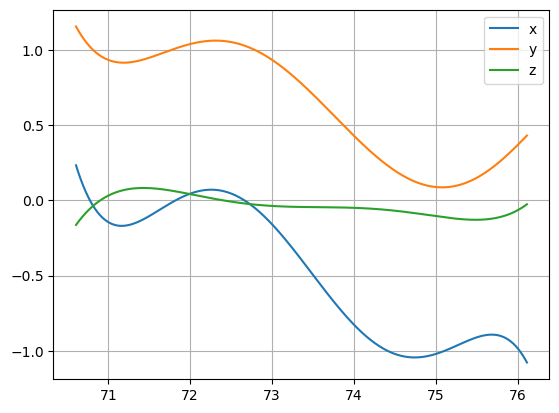

In [51]:
coef_x = df.iloc[test,:6]
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = df.iloc[test,6:12]
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = df.iloc[test,12:]
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

### **Splines**

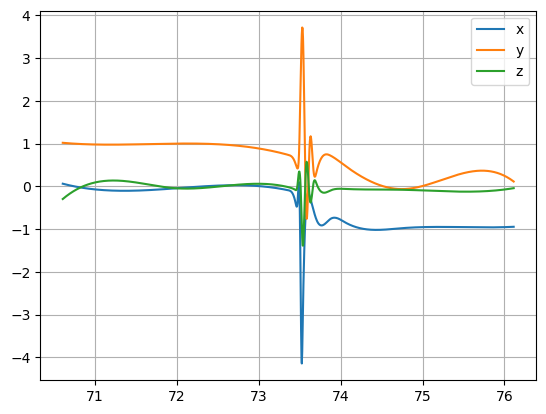

In [52]:
tck_x = splrep(t,x,s=25)
spline_x = splev(t,tck_x)

tck_y = splrep(t,y,s=25)
spline_y = splev(t,tck_y)

tck_z = splrep(t,z,s=25)
spline_z = splev(t,tck_z)

plt.plot(t,spline_x,label='x')
plt.plot(t,spline_y,label='y')
plt.plot(t,spline_z,label='z')

plt.grid()
plt.legend()
plt.show()


### **Length**

In [53]:
def extrapolen(ls):

    # Create columns of the output dataset
    columns = ['len']
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)
        t = np.asarray(ls[i].t)
        row = len(t)
        df.loc[i] = row
    return df


dflen = extrapolen(li)
dflen

,len
0,1336
1,1674
2,1518
3,1457
4,1838
...,...
463,1838
464,1194
465,1160
466,1805


<AxesSubplot:>

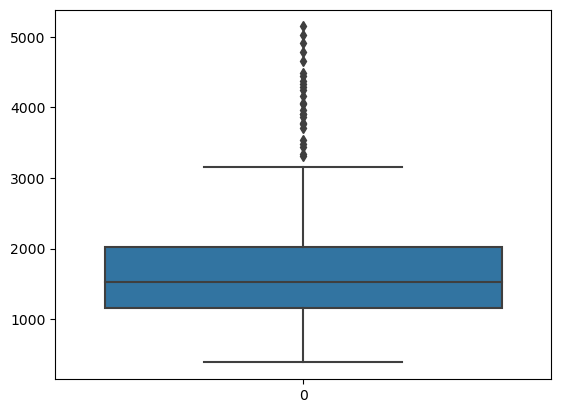

In [54]:
sns.boxplot(dflen.len)

(array([ 35., 148., 122.,  78.,  52.,   7.,   6.,   9.,   7.,   4.]),
 array([ 388. ,  863.8, 1339.6, 1815.4, 2291.2, 2767. , 3242.8, 3718.6,
        4194.4, 4670.2, 5146. ]),
 <BarContainer object of 10 artists>)

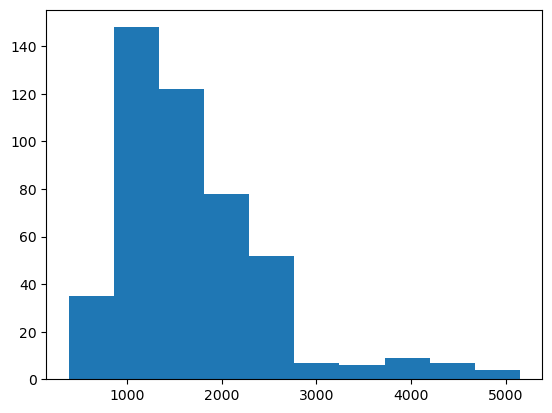

In [55]:
plt.hist(dflen.len)

In [56]:
dfc = pd.read_csv('classes.csv')
dfc

dflc = pd.concat([dflen,dfc],axis=1)
dflc

,len,code,class
0,1336,MR,1
1,1674,MR,1
2,1518,MR,1
3,1457,MR,1
4,1838,MR,1
...,...,...,...
463,1838,FB,2
464,1194,FF,2
465,1160,FF,2
466,1805,FS,2


<AxesSubplot:xlabel='class', ylabel='len'>

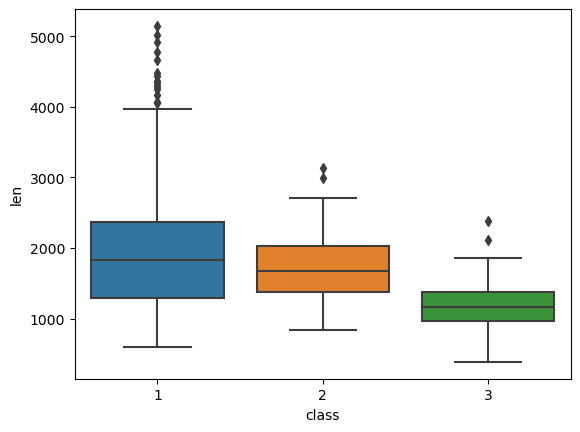

In [57]:
sns.boxplot(x='class',y='len', data=dflc)

### **Parameter Selection**

#### Means

<AxesSubplot:xlabel='class'>

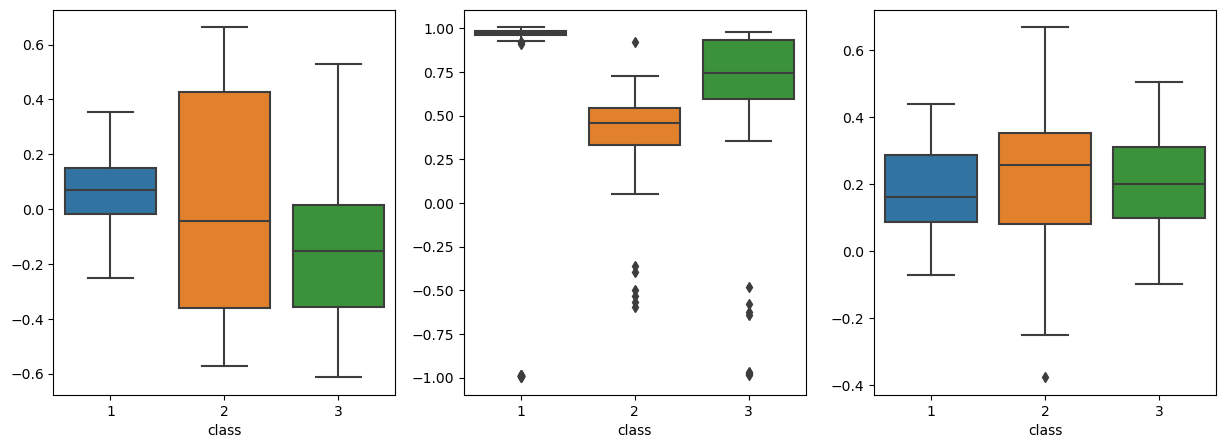

In [58]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=dfc,ax=axs[2])

##### Variances

<AxesSubplot:xlabel='class'>

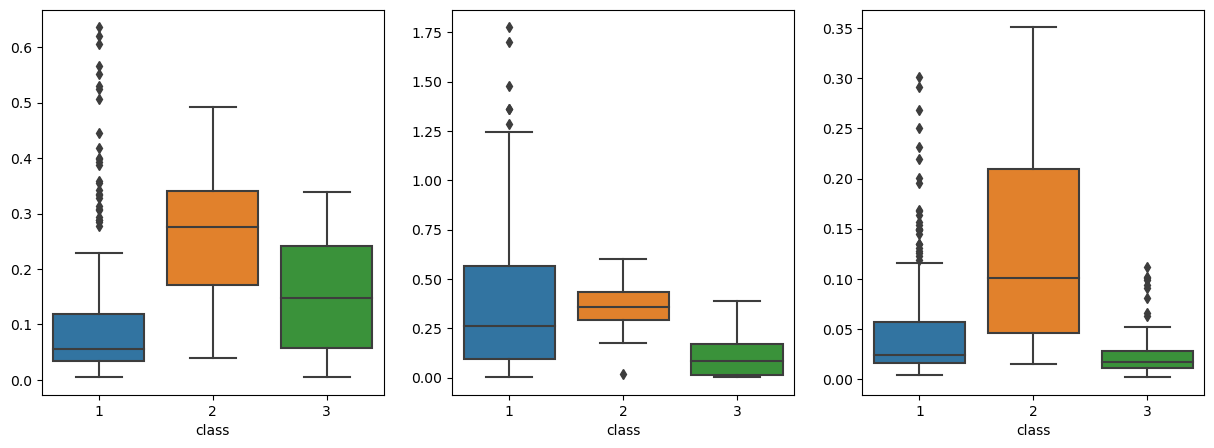

In [59]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=dfc,ax=axs[2])

#### Max - Min & argMax - argMin

<AxesSubplot:xlabel='class'>

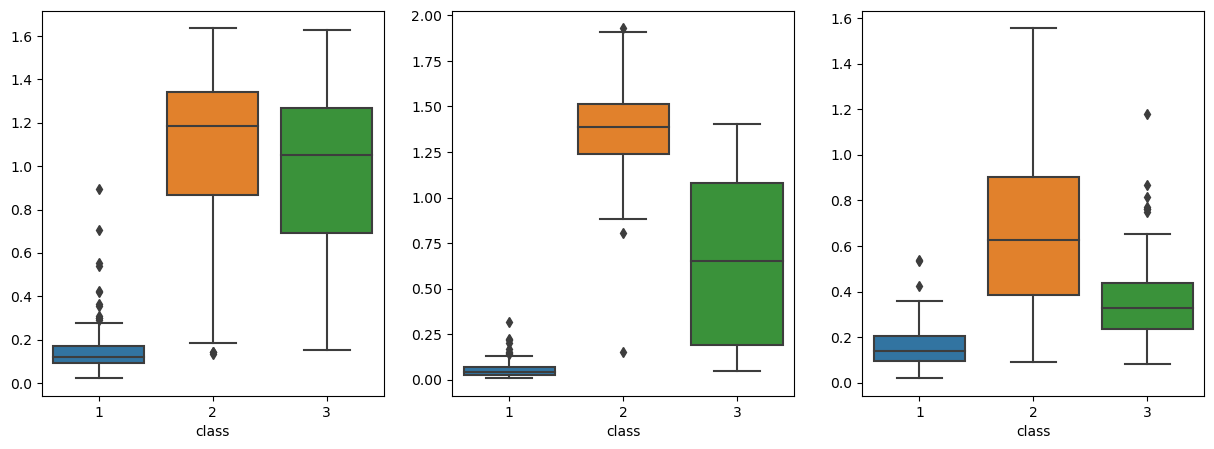

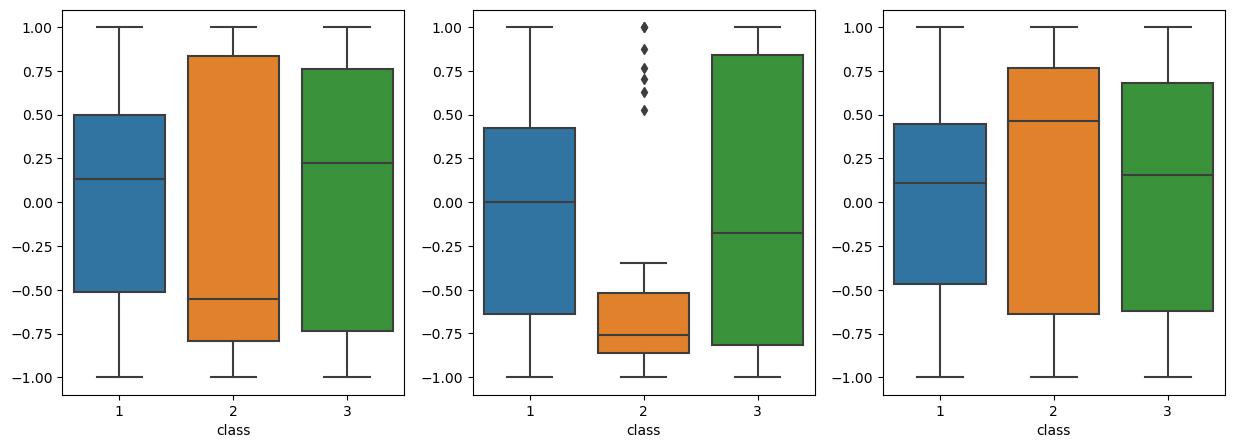

In [60]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(df)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t)

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=dfc,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=dfc,ax=axs[2])


#### Peaks over Threshold

<AxesSubplot:xlabel='class'>

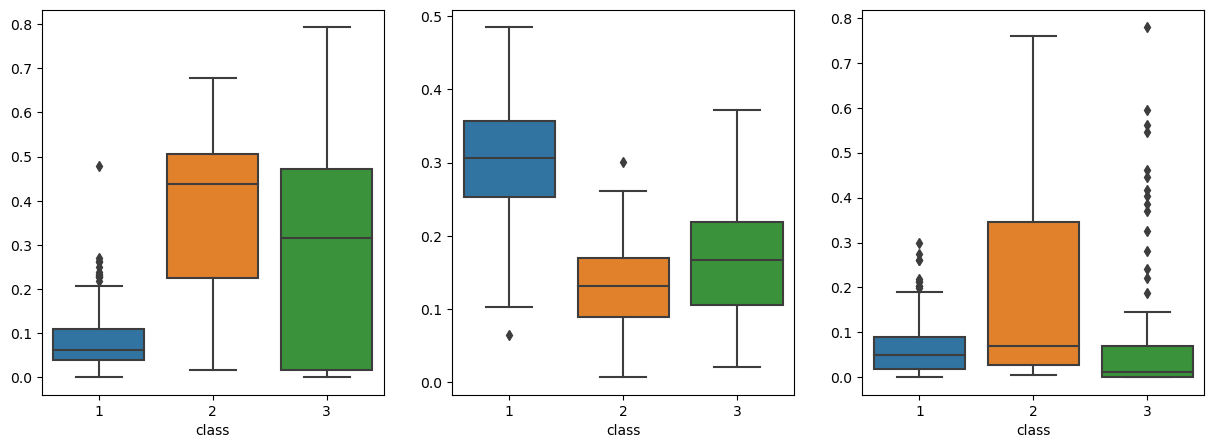

In [61]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=dfc,ax=axs[2])

#### Positive/Tot

<AxesSubplot:xlabel='class'>

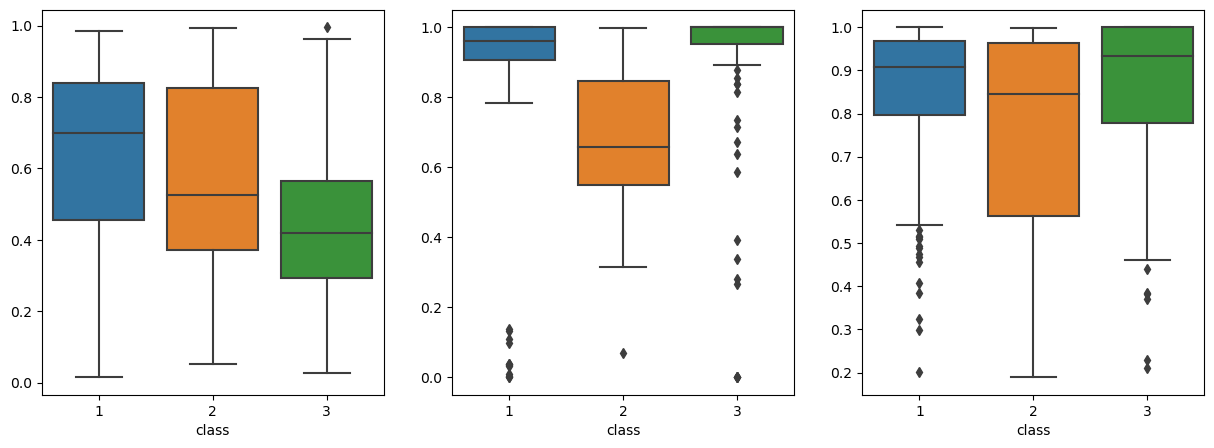

In [62]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=dfc,ax=axs[2])

#### Energy

<AxesSubplot:xlabel='class'>

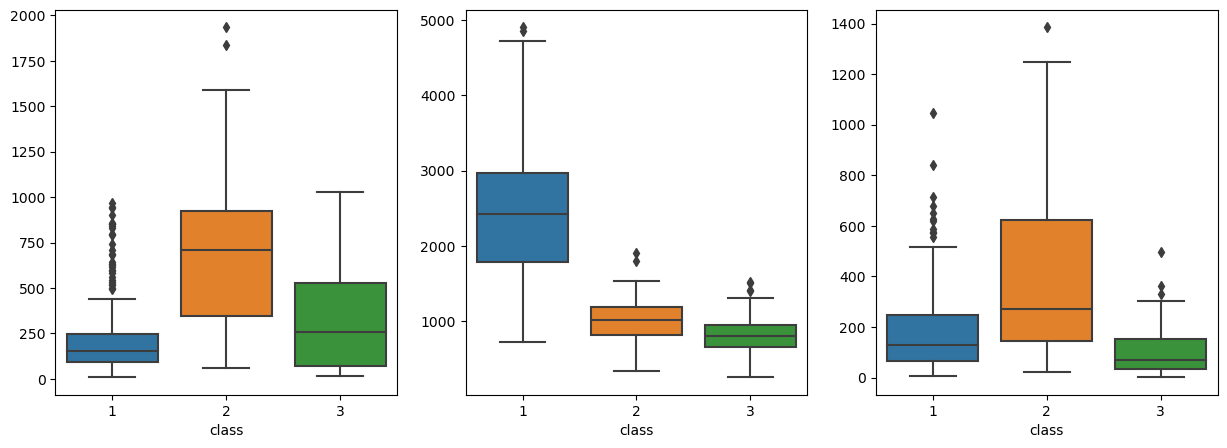

In [63]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=dfc,ax=axs[2])

#### Power

<AxesSubplot:xlabel='class'>

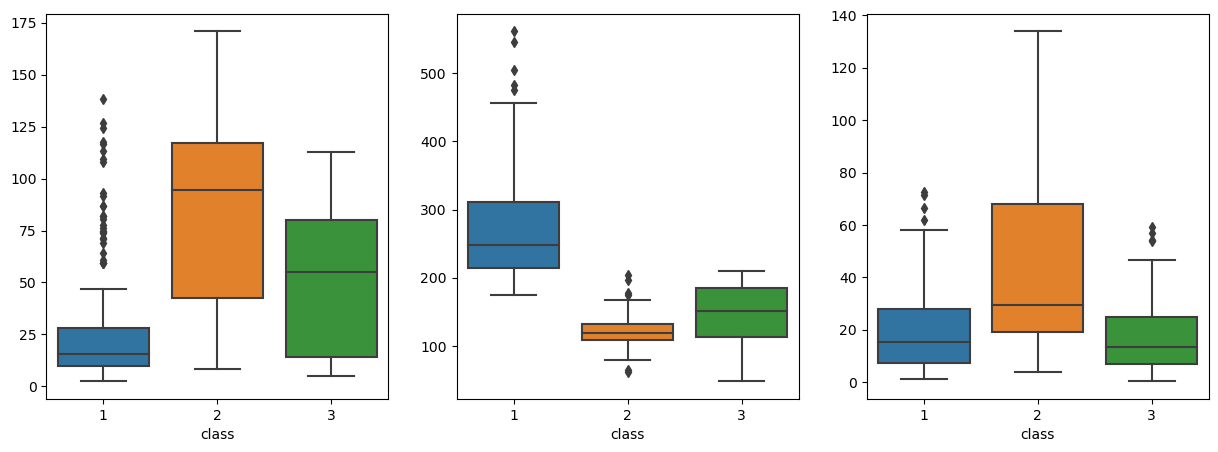

In [64]:
powers_x = []
powers_y = []
powers_z = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=dfc,ax=axs[2])

#### Median

<AxesSubplot:xlabel='class'>

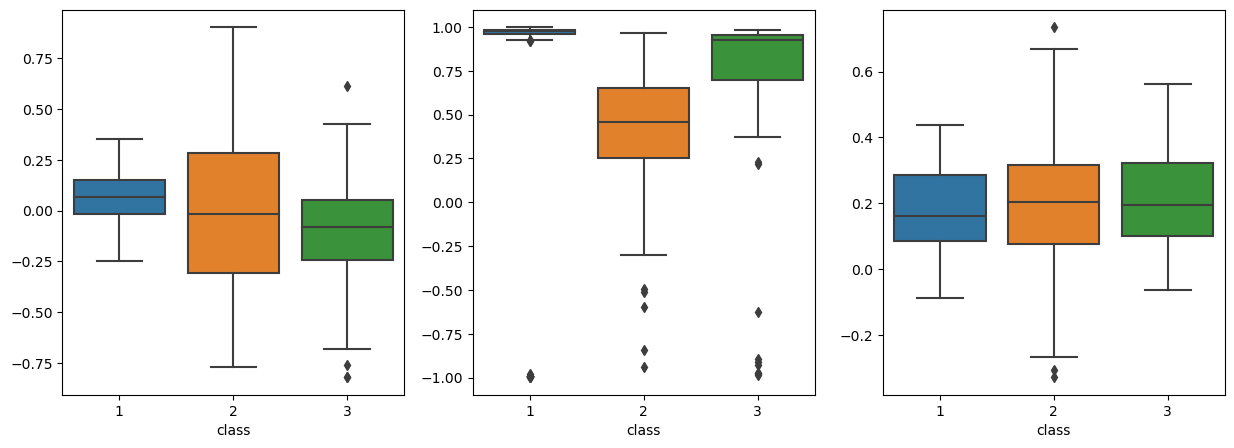

In [65]:
median_x = []
median_y = []
median_z = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    median_x.append(np.median(poly_x(t)))

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    median_y.append(np.median(poly_y(t)))

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    median_z.append(np.median(poly_z(t)))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=dfc,ax=axs[2])



#### Mode

<AxesSubplot:xlabel='class'>

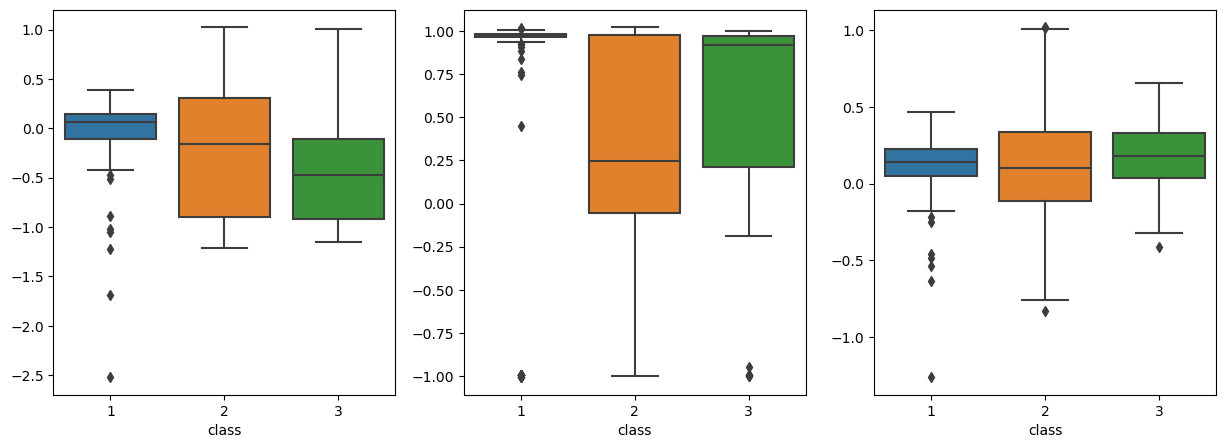

In [66]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x, keepdims = True)[0][0])
    mode_y.append(stats.mode(li[i].y, keepdims = True)[0][0])
    mode_z.append(stats.mode(li[i].z, keepdims = True)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=dfc,ax=axs[2])


#### Skewness

<AxesSubplot:xlabel='class'>

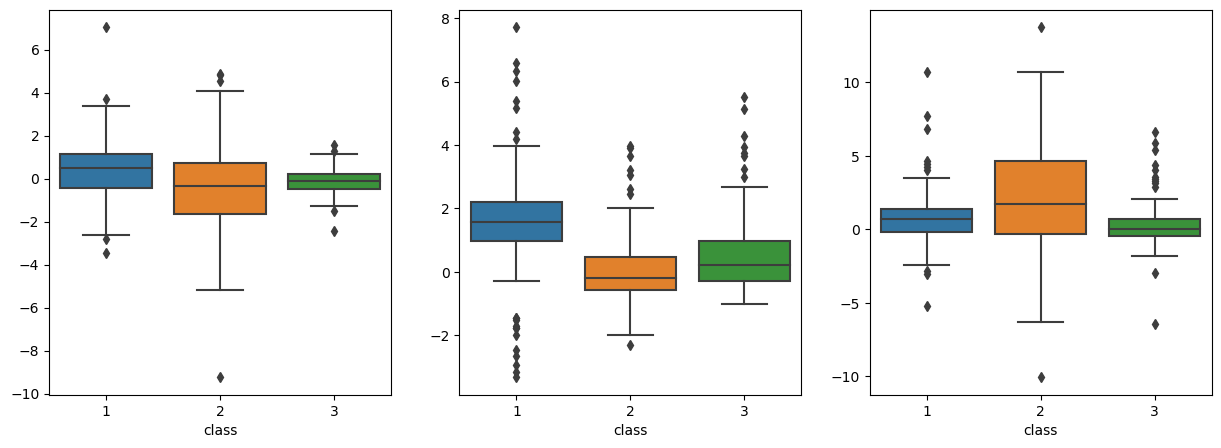

In [67]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=dfc,ax=axs[2])



#### Kurtosis

(-10.0, 160.0)

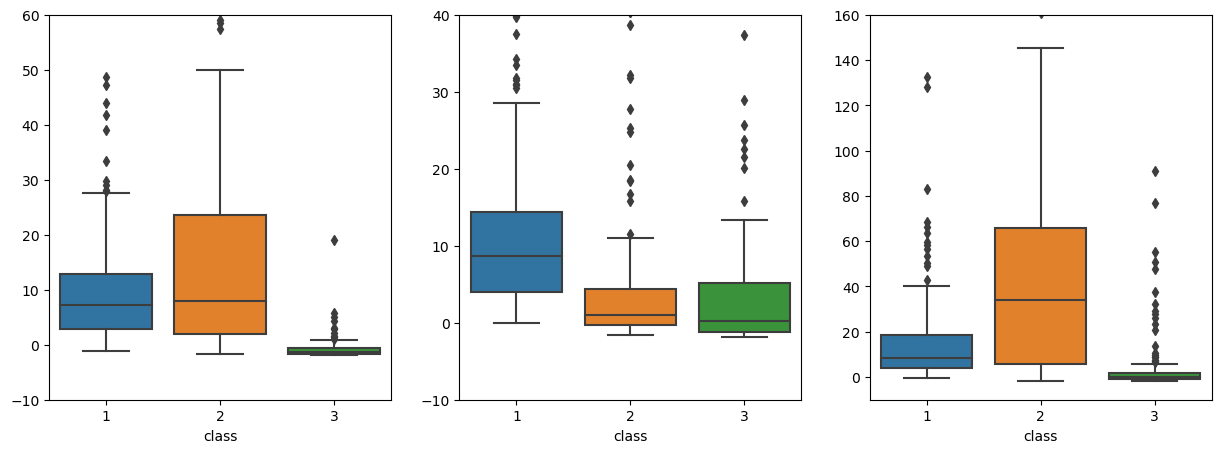

In [68]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=dfc,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=dfc,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=dfc,ax=axs[2])
axs[2].set_ylim(-10,160)



#### RMS

<AxesSubplot:xlabel='class'>

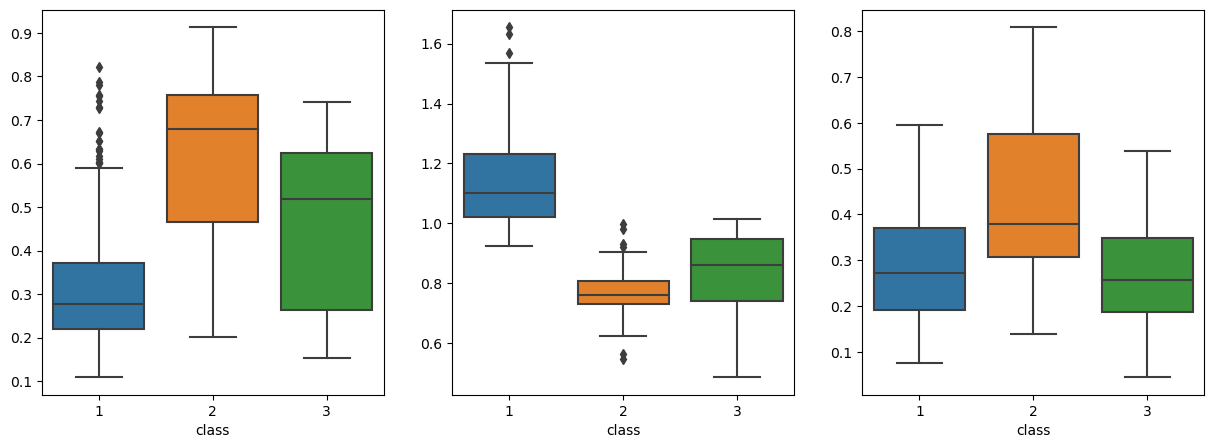

In [69]:
rms_x = []
rms_y = []
rms_z = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=dfc,ax=axs[2])




#### Temporal_centroid

<AxesSubplot:xlabel='class'>

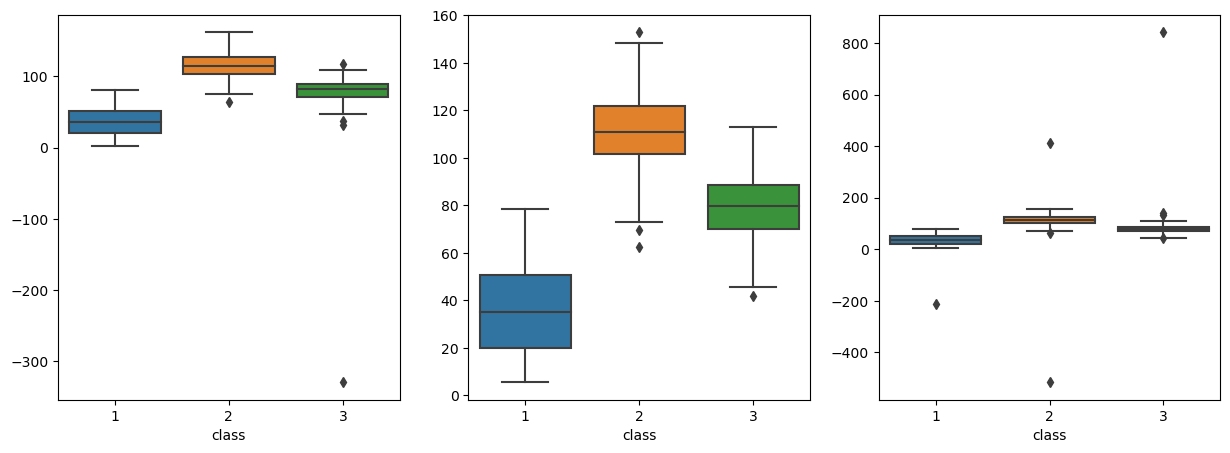

In [80]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []

for i in np.arange(len(li)):
    fs = li[i].t[2]-li[i].t[1]
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=dfc,ax=axs[2])

### **Create dataset**

In [70]:
columns = []
for prefix in ['x', 'y', 'z']:
    columns.append(f"mean_{prefix}")
    columns.append(f"var_{prefix}")
    
data = pd.DataFrame({'mean_x': means_x,
                     'mean_y': means_y,
                     'mean_z': means_z,
                     'var_x': vars_x,
                     'var_y': vars_y,
                     'var_z': vars_z,
                     'max-min_x': delta_x,
                     'max-min_y': delta_y,
                     'max-min_z': delta_z,
                     '%_peaks_x': peaks_x,
                     '%_peaks_y': peaks_y,
                     '%_peaks_z': peaks_z,
                     '%_positive_x': pn_x,
                     '%_positive_y': pn_y,
                     '%_positive_z': pn_z,
                     'power_x': powers_x,
                     'power_y': powers_y,
                     'power_z': powers_z
                    })
            
data = pd.concat([data,dflc],axis=1)
data = data.drop('code',axis=1)

data.to_csv('data.csv', index=False)

### **Classification**

In [71]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a logistic regression model
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# Fit the model using the training data
clf.fit(X_train, y_train)

# Evaluate the model using the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

# Predict the classes using the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9658119658119658
[[51  0  0]
 [ 0 27  3]
 [ 0  1 35]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


#### 10 Classes

In [73]:
dftc = pd.read_csv('more_classes.csv')
data10 = pd.DataFrame({'mean_x': means_x,
                     'mean_y': means_y,
                     'mean_z': means_z,
                     'var_x': vars_x,
                     'var_y': vars_y,
                     'var_z': vars_z,
                     'max-min_x': delta_x,
                     'max-min_y': delta_y,
                     'max-min_z': delta_z,
                     'argmax-argmin_x': deltarg_x,
                     'argmax-argmin_y': deltarg_y,
                     'argmax-argmin_z': deltarg_z,
                     '%_peaks_x': peaks_x,
                     '%_peaks_y': peaks_y,
                     '%_peaks_z': peaks_z,
                     '%_positive_x': pn_x,
                     '%_positive_y': pn_y,
                     '%_positive_z': pn_z,
                     'power_x': powers_x,
                     'power_y': powers_y,
                     'power_z': powers_z})
data10 = pd.concat([data10,dftc],axis=1)
data10 = data10.drop('code',axis=1)
data10
data10.to_csv('data10.csv', index=False)

In [74]:
X10=data10.iloc[:,:-1]
y10=data10.iloc[:,-1].values

# Split the data into train and test sets
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.2, random_state=0)

# Create a logistic regression model
clf10 = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# Fit the model using the training data
clf10.fit(X10_train, y10_train)

# Evaluate the model using the test data
score10 = clf10.score(X10_test, y10_test)
print("Accuracy10:", score10)

# Predict the classes using the test data
y10_pred = clf10.predict(X10_test)

# Print the confusion matriX10
cm10 = confusion_matrix(y10_test, y10_pred)
print(cm10)

Accuracy10: 0.776595744680851
[[12  0  0  0  0  0  0  0  0  1]
 [ 0 10  2  0  0  0  0  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  8  2  0  0]
 [ 0  0  0  1  0  0  0  5  1  0]
 [ 0  0  0  0  0  0  0  3  4  1]
 [ 0  0  0  0  0  0  0  2  1 19]]
